In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os import path
from scipy.stats import poisson
%matplotlib inline

In [2]:
world_cup_matches = pd.read_csv('WorldCupMatches.csv')
world_cup_player = pd.read_csv('WorldCupPlayers.csv')
world_cups=pd.read_csv('WorldCups.csv')
matches=pd.read_csv('results.csv')

In [3]:
world_cup_matches = world_cup_matches.dropna()
world_cup_player = world_cup_player.dropna()
world_cups = world_cups.dropna()

In [4]:
world_cup_matches = world_cup_matches.replace('Germany FR', 'Germany')
world_cup_player = world_cup_player.replace('Germany FR', 'Germany')
world_cups = world_cups.replace('Germany FR', 'Germany')

In [5]:
world_cup_matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [6]:
world_cup_player.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
35,201,1090,USA,MILLAR Bob (USA),S,0,Tom FLORIE,C,G45'
74,201,1093,BRA,DE CARVALHO Pindaro (BRA),S,0,PREGUINHO,C,G62'
113,201,1098,PER,BRU Francisco (ESP),S,0,Placido GALINDO,C,R70'
415,201,1091,BRA,DE CARVALHO Pindaro (BRA),S,0,PREGUINHO,C,G67' G83'
468,201,1089,PAR,DURAND LAGUNA Jose (ARG),S,0,Luis VARGAS PENA,C,G40'


In [7]:
world_cup_matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 0 to 851
Data columns (total 20 columns):
Year                    850 non-null float64
Datetime                850 non-null object
Stage                   850 non-null object
Stadium                 850 non-null object
City                    850 non-null object
Home Team Name          850 non-null object
Home Team Goals         850 non-null float64
Away Team Goals         850 non-null float64
Away Team Name          850 non-null object
Win conditions          850 non-null object
Attendance              850 non-null float64
Half-time Home Goals    850 non-null float64
Half-time Away Goals    850 non-null float64
Referee                 850 non-null object
Assistant 1             850 non-null object
Assistant 2             850 non-null object
RoundID                 850 non-null float64
MatchID                 850 non-null float64
Home Team Initials      850 non-null object
Away Team Initials      850 non-null object
dtypes:

Text(0.5,1,'Number of matches played in various cities')

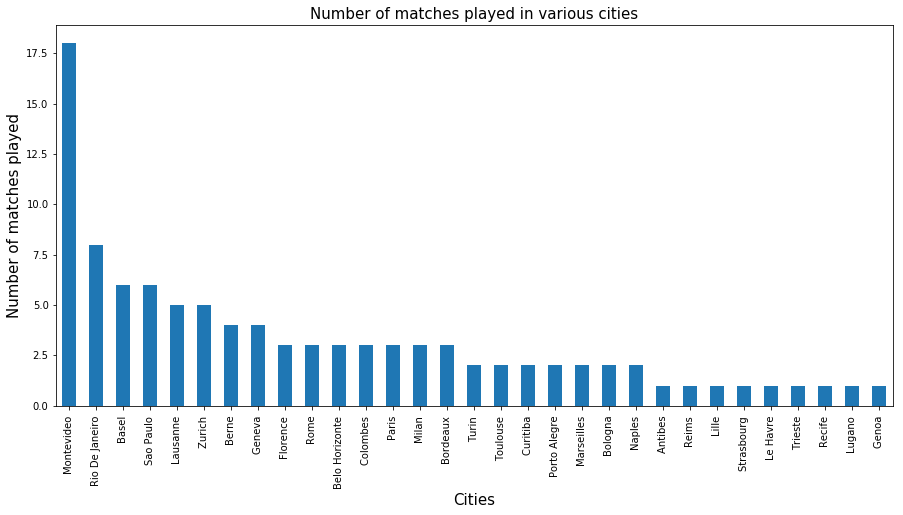

In [8]:
world_cup_matches['City'][:100].value_counts().plot(kind='bar',figsize=(15,7))
plt.xlabel('Cities',fontsize=15)
plt.ylabel('Number of matches played',fontsize=15)
plt.title('Number of matches played in various cities',fontsize=15)

- From the above graph we can easily conclude number of matches played in a particular city. x label shows the Cities and y label shows the number of matches played.

Text(0.5,1,'Number of matches played in a particular stadium')

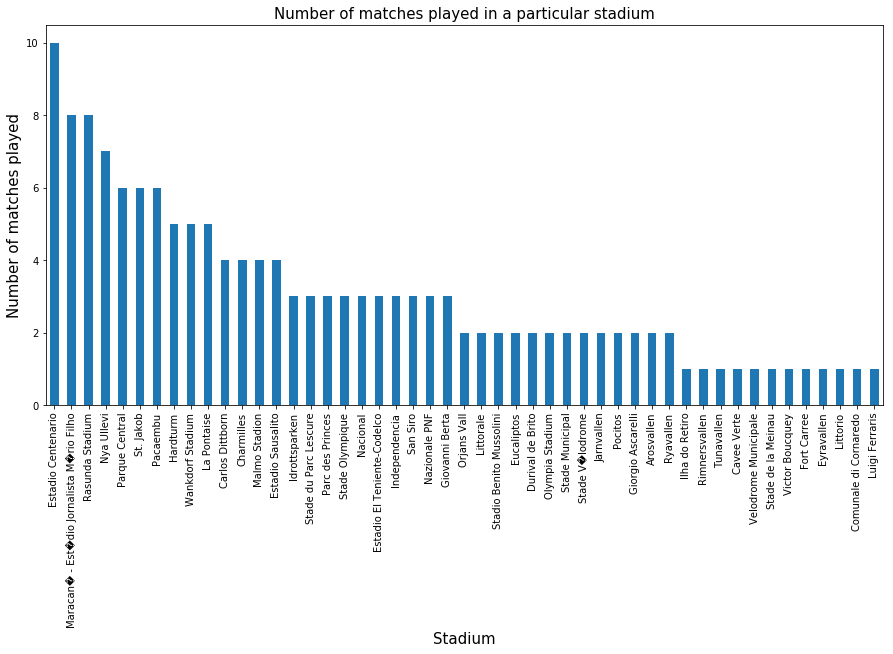

In [9]:
world_cup_matches['Stadium'][:150].value_counts().plot(kind='bar',figsize=(15,7))
plt.xlabel('Stadium',fontsize=15)
plt.ylabel('Number of matches played',fontsize=15)
plt.title('Number of matches played in a particular stadium',fontsize=15)

- From the above graph we can easily conclude number of matches played in a particular stadium like in stadium 
Estadio Centenario maximum number of matches are played and so on. x label showns the Stadiums and y label shows the number of matches played.

Text(0.5,1,'Players playing count in Team Brazil')

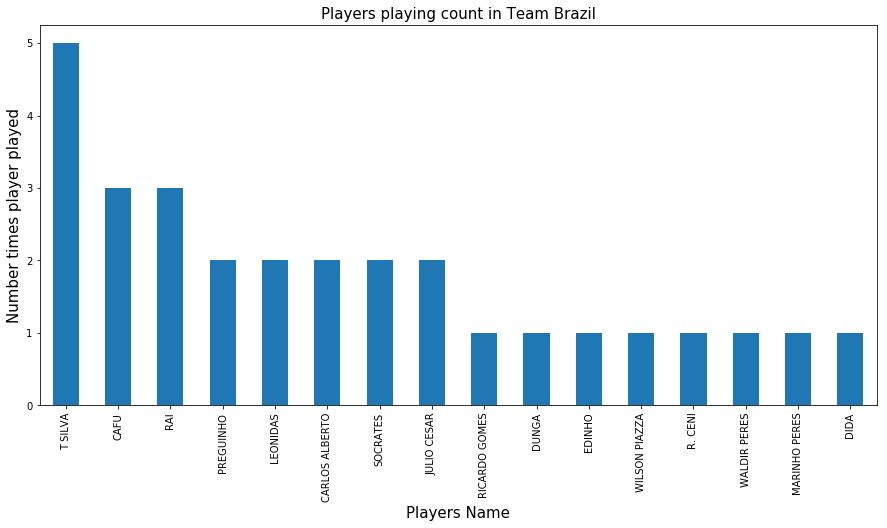

In [10]:
is_Brazil=world_cup_player['Team Initials']=='BRA'
c=world_cup_player[is_Brazil]
c.sort_values('Player Name')
c['Player Name'].value_counts().plot(figsize=(15,7),kind='bar')
plt.xlabel('Players Name',fontsize=15)
plt.ylabel('Number times player played',fontsize=15)
plt.title('Players playing count in Team Brazil',fontsize=15)

- From the above graph we can easily conclude that how many times a particular player has played for the Country Brazil like from above graph we can analyse that T Silva has played the maximum number of times for Brazil. x label shows the player name and y label shows the palying count of that player for the country Brazil.

In [11]:
world_cup_player[['Team Initials','Player Name']].groupby('Team Initials')

In [12]:
world_cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768.607


Text(0.5,1,'Number of wins by different countries')

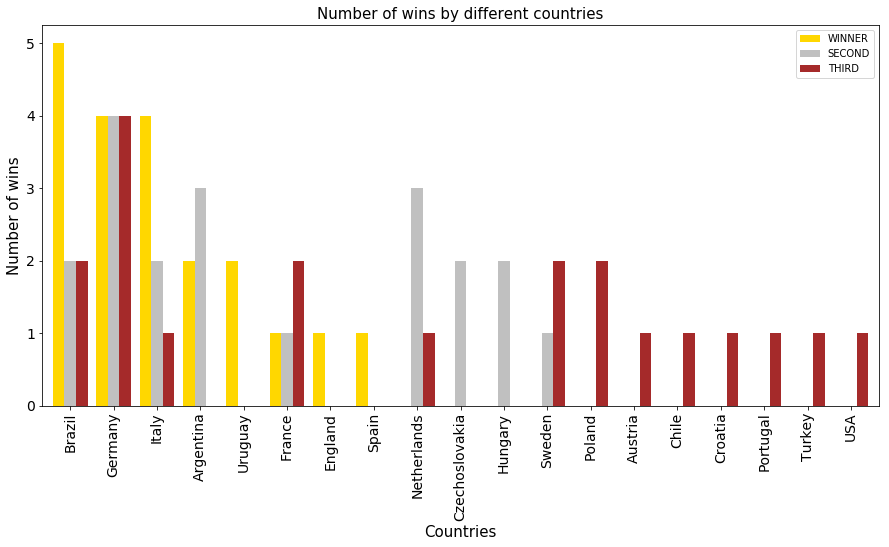

In [13]:
gold = world_cups["Winner"]
silver = world_cups["Runners-Up"]
bronze = world_cups["Third"]
medal = world_cups["Fourth"]

gold_count = pd.DataFrame.from_dict(gold.value_counts())
silver_count = pd.DataFrame.from_dict(silver.value_counts())
bronze_count = pd.DataFrame.from_dict(bronze.value_counts())
wins_number = gold_count.join(silver_count, how='outer').join(bronze_count, how='outer')
wins_number = wins_number.fillna(0)
wins_number.columns = ['WINNER', 'SECOND', 'THIRD']
wins_number = wins_number.astype('int64')
wins_number = wins_number.sort_values(by=['WINNER', 'SECOND', 'THIRD'],ascending=False)

wins_number.plot(y=['WINNER','SECOND','THIRD'], kind="bar",color =['gold','silver','brown'], figsize=(15,7),fontsize=14,width=0.8, align='center')

plt.xlabel('Countries',fontsize=15)
plt.ylabel('Number of wins',fontsize=15)
plt.title('Number of wins by different countries',fontsize=15)

- From the above graph we can conclude that how many times a particular country has been the winner or has come second or third in the matches. Like from the above graph it can be seen that Brazil has been the winner maximum number of times but Germany has came second and third maximum number of times. x label shows the name of Countries and y label shows the wins count.

Text(0.5,1,'Top 10 of Number of goals by country')

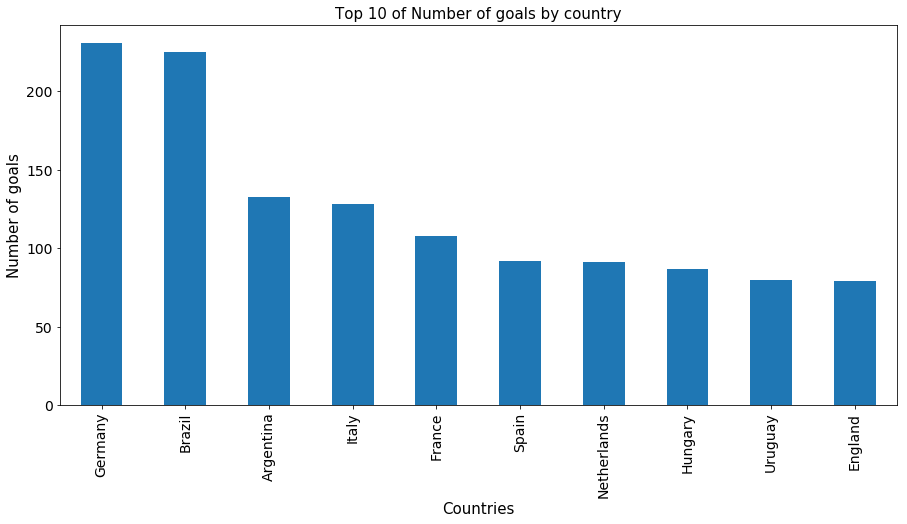

In [14]:
home = world_cup_matches[['Home Team Name','Home Team Goals']].dropna()
away = world_cup_matches[['Away Team Name','Away Team Goals']].dropna()

goal_by_country = pd.DataFrame(columns=['countries','goals'])
goal_by_country = goal_by_country.append(home.rename(index=str, columns={'Home Team Name':'countries','Home Team Goals':'goals'}))
goal_by_country = goal_by_country.append(away.rename(index=str, columns={'Away Team Name': 'countries', 'Away Team Goals': 'goals'}))
goal_by_country['goals'] = goal_by_country['goals'].astype('int64')
goal_by_country = goal_by_country.groupby(['countries'])['goals'].sum().sort_values(ascending=False)
goal_by_country[:10].plot(x=goal_by_country.index, y=goal_by_country.values,kind="bar",figsize=(15,7),fontsize=14)
plt.xlabel('Countries',fontsize=15)
plt.ylabel('Number of goals',fontsize=15)
plt.title('Top 10 of Number of goals by country',fontsize=15)

- The above graph shows the top 10 number of goals by country in which Germany has made the maximum number of goals and Uruguay and England has made the least number of goals.x label shows the countries and y label shwos the goals count made by that country.

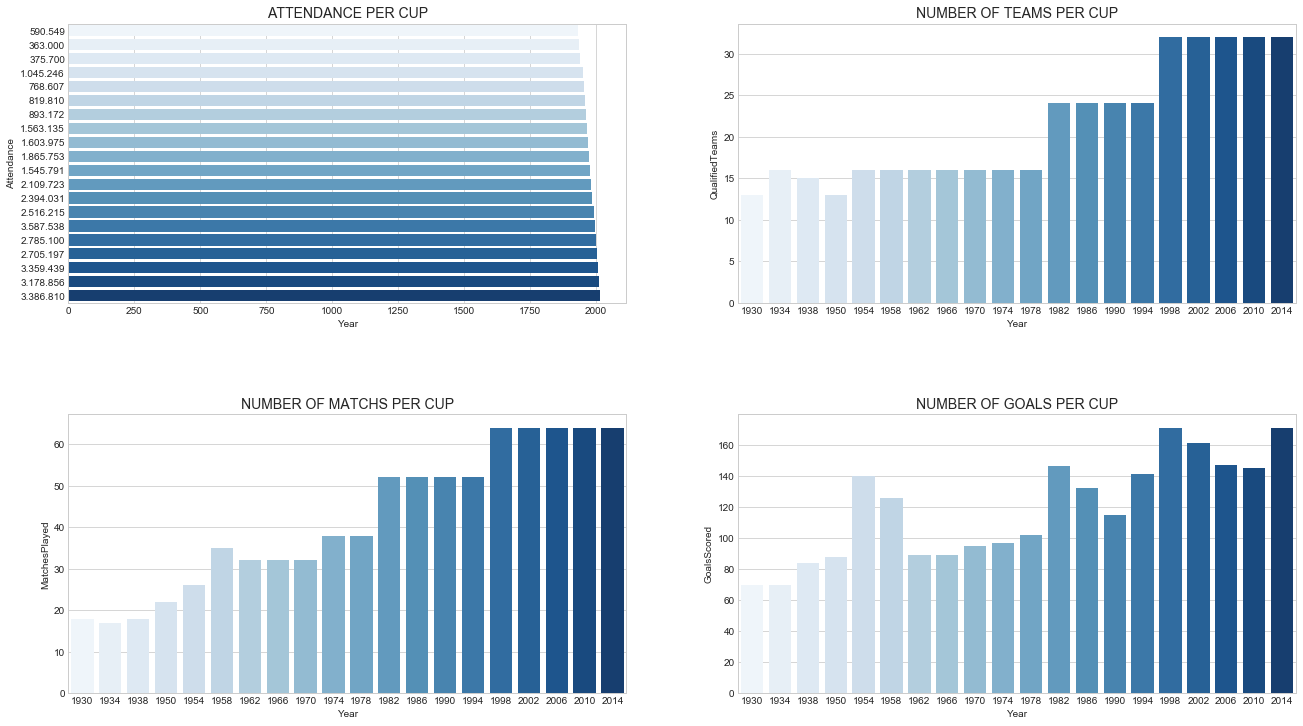

In [15]:
plt.figure(figsize = (22,12))
sns.set_style("whitegrid")
plt.subplot(221)
graph1= sns.barplot(x="Year", y="Attendance",data=world_cups, palette="Blues")
graph1.set_title("ATTENDANCE PER CUP", fontsize=14)

plt.subplot(222)
graph2 = sns.barplot(x="Year", y="QualifiedTeams", data=world_cups, palette="Blues")
graph2.set_title("NUMBER OF TEAMS PER CUP", fontsize=14)

plt.subplot(223)
graph2=sns.barplot(x="Year", y="MatchesPlayed", data=world_cups, palette="Blues")
graph2.set_title("NUMBER OF MATCHS PER CUP", fontsize=14)

plt.subplot(224)
graph2 = sns.barplot(x="Year", y="GoalsScored", data=world_cups, palette="Blues")
graph2.set_title("NUMBER OF GOALS PER CUP", fontsize=14)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

- The first graph shows the attendance of audiences in various cups in a particular year. x label shows the year and y label shows the attendance.
- Th second graph shows the count of the teams qualified for a particular cup in that given year. x label shows the Year and y label shows the number of teams qualified.
- The third graph shows the count of matches played for a particular cup in the year. x label shows the year and y label shows the number of matches played.
- The fourth graph shows the total number of goals made in a particular cup in that year. x label shows the year and y
label shows the total number of goals made. 


In [16]:
matches.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


Text(0.5,1,'TOP 10 TYPE OF MATCH TOURNAMENTS')

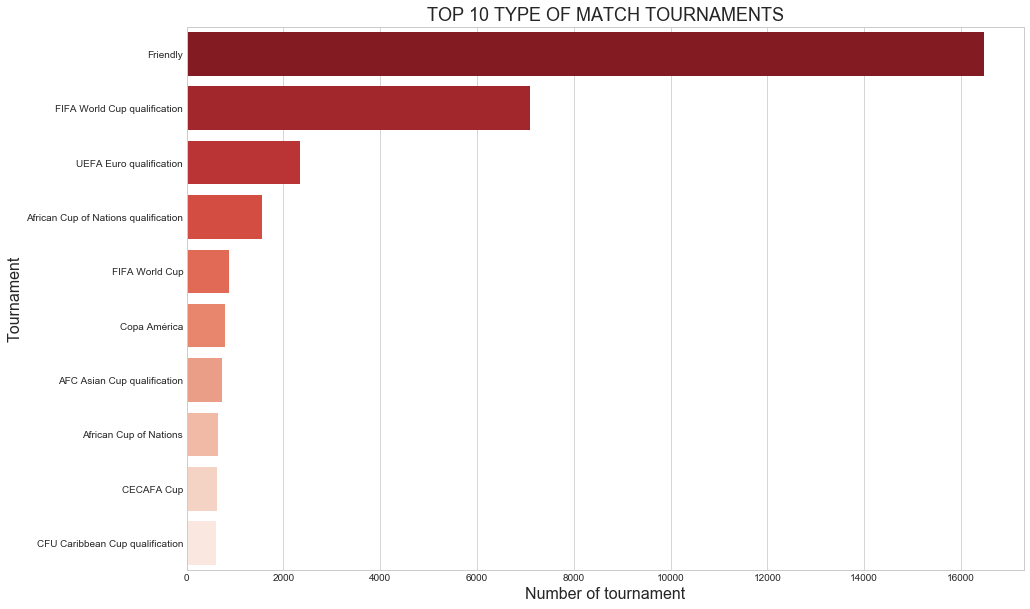

In [17]:
tournament = matches['tournament'].value_counts()
tournament = tournament[:10]

plt.figure(figsize = (15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=tournament.index, x=tournament.values, palette="Reds_r", orient='h')
ax.set_ylabel('Tournament', size=16)
ax.set_xlabel('Number of tournament', size=16)
ax.set_title("TOP 10 TYPE OF MATCH TOURNAMENTS", fontsize=18)

- The above graph shows top 10 type of tournaments played in Football in which Friendly type of tournament is played the most. x label shows tournament's count and y label shows the Tournament type.

In [18]:
home = matches[['home_team', 'home_score']].rename(columns={'home_team':'team', 'home_score':'score'})
away = matches[['away_team', 'away_score']].rename(columns={'away_team':'team', 'away_score':'score'})
team_score = home.append(away).reset_index(drop=True)
country_info = team_score.groupby('team')['score'].agg(['sum','count','mean']).reset_index()
country_info = country_info.rename(columns={'sum':'nb_goals', 'count':'nb_matches', 'mean':'goal_avg'})
del home, away

Text(0.5,1,'TOP 10 OF NUMBER OF MATCHES')

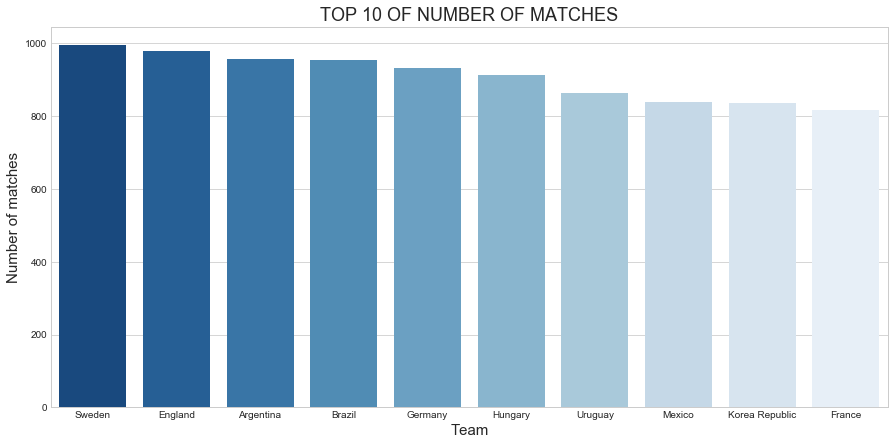

In [19]:
plt.figure(figsize =(15,7))
sns.set_style("whitegrid")
plt_data = country_info.sort_values(by='nb_matches', ascending=False)[:10]
ax = sns.barplot(x="team", y="nb_matches", data=plt_data, palette="Blues_r")
ax.set_xlabel('Team', size=15)
ax.set_ylabel('Number of matches', size=15)
ax.set_title("TOP 10 OF NUMBER OF MATCHES", fontsize=18)

- The above graph shows the Top 10 number of matches played by the teams in which Sweden has played the maximum number of matches. x label shows the Top 10 teams and y label shows the number of matches played.

Text(0.5,1,'TOP 10 OF NUMBER OF GOALS')

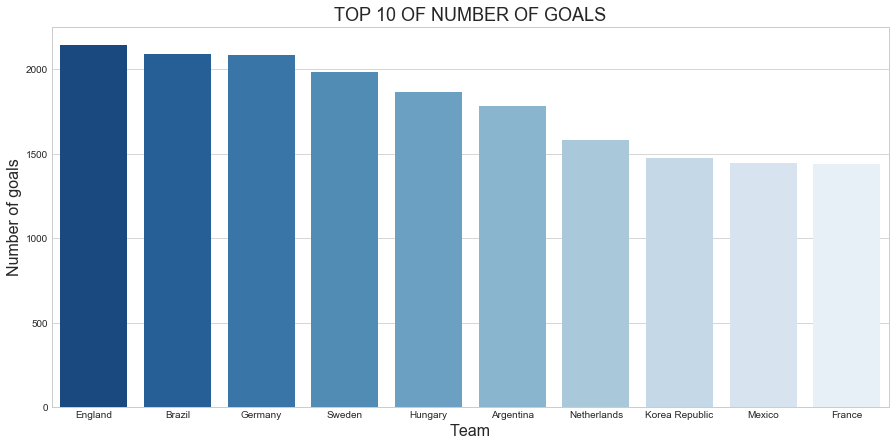

In [20]:
plt.figure(figsize = (15,7))
sns.set_style("whitegrid")
plt_data = country_info.sort_values(by='nb_goals', ascending=False)[:10]
goal = sns.barplot(x="team", y="nb_goals", data=plt_data, palette="Blues_r")
goal.set_xlabel('Team', size=16)
goal.set_ylabel('Number of goals', size=16)
goal.set_title("TOP 10 OF NUMBER OF GOALS", fontsize=18)

- The above graph shows the Top 10 number of goals made by the teams in which England has made the maximum number of goals. x label shows the Top 10 teams and y label shows the number of goals made.

Text(0.5,1,'TOP 10 OF GOAL AVERAGE PER MATCH')

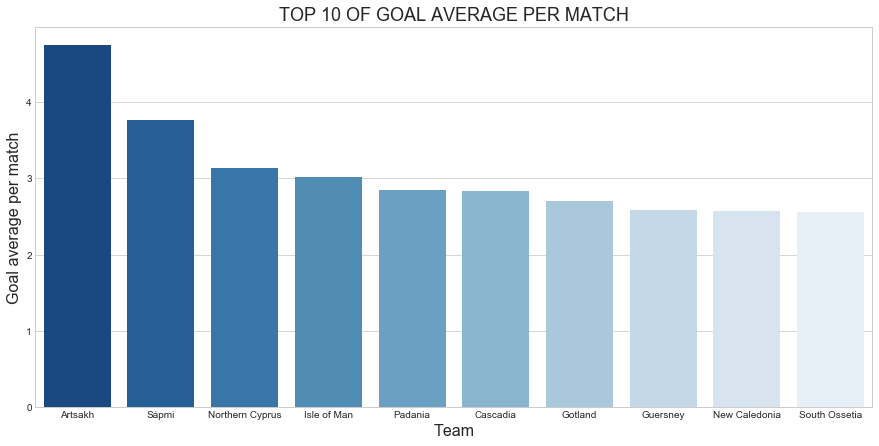

In [21]:
plt.figure(figsize = (15,7))
sns.set_style("whitegrid")
plt_data = country_info.sort_values(by='goal_avg', ascending=False)[:10]
goal = sns.barplot(x="team", y="goal_avg", data=plt_data, palette="Blues_r")
goal.set_xlabel('Team', size=16)
goal.set_ylabel('Goal average per match', size=16)
goal.set_title("TOP 10 OF GOAL AVERAGE PER MATCH", fontsize=18)

- The above graph shows the Top 10 goals made per match by the teams in which Artsakh has made the maximum number of goals per match. x label shows the Top 10 teams and y label shows the goals made per match.

In [22]:
means = matches[['home_score','away_score']].mean()
means

home_score    1.747819
away_score    1.187900
dtype: float64

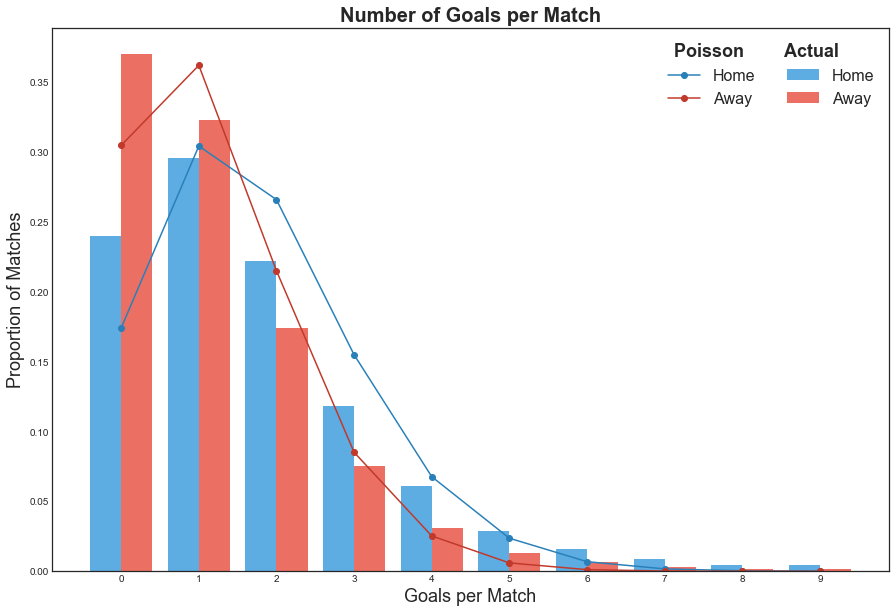

In [23]:
plt.figure(figsize=(15,10))
sns.set_style("white")
# construct Poisson  for each mean goals value
poisson_pred = np.column_stack([[poisson.pmf(k, means[j]) for k in range(10)] for j in range(2)])
# plot histogram of actual goals
plt.hist(matches[['home_score', 'away_score']].values, range(11), alpha=0.8,
         label=['Home', 'Away'],normed=True, color=["#3498db", "#e74c3c"])

# add lines for the Poisson distributions
pois1, = plt.plot([i-0.5 for i in range(1,11)], poisson_pred[:,0],
                  linestyle='-', marker='o',label="Home", color = '#2980b9')
pois2, = plt.plot([i-0.5 for i in range(1,11)], poisson_pred[:,1],
                  linestyle='-', marker='o',label="Away", color = '#c0392b')

leg=plt.legend(loc='upper right', fontsize=16, ncol=2)
leg.set_title("Poisson        Actual      ", prop = {'size':'18', 'weight':'bold'})

plt.xticks([i-0.5 for i in range(1,11)],[i for i in range(11)])
plt.xlabel("Goals per Match",size=18)
plt.ylabel("Proportion of Matches",size=18)
plt.title("Number of Goals per Match",size=20,fontweight='bold')
plt.show()

- The above graph shows the number goals made per match by the home teams and away teams in which the goals made in  proportion of matches by away teams is the highest. x label shows the goals made per match and y label shows the proportion of matches played.

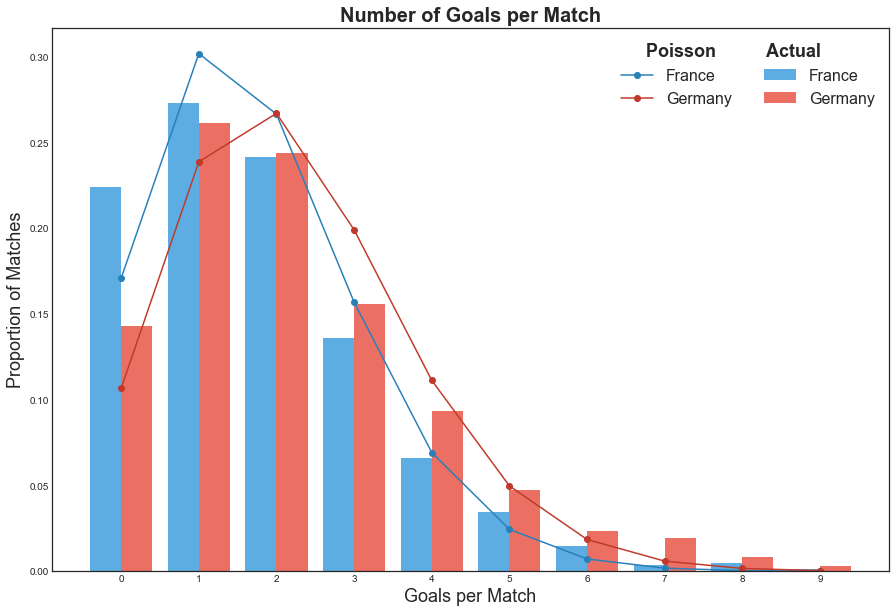

In [24]:
plt.figure(figsize=(15,10))
sns.set_style("white")
team1,team2 = "France", "Germany"
matches_t1 = team_score[team_score['team'] == team1]
matches_t2 = team_score[team_score['team'] == team2]
    
mean_t1 = matches_t1['score'].mean()
mean_t2 = matches_t2['score'].mean()

# construct Poisson  for each mean goals value
prediction_t1 = [poisson.pmf(k, mean_t1) for k in range(10)]
prediction_t2 = [poisson.pmf(k, mean_t2) for k in range(10)]

# plot histogram of actual goals
plt.hist([matches_t1['score'].values, matches_t2['score'].values], range(11), alpha=0.8,
         label=[team1, team2],normed=True, color=["#3498db", "#e74c3c"])

# add lines for the Poisson distributions
prediction1,= plt.plot([i-0.5 for i in range(1,11)], prediction_t1,
                  linestyle='-', marker='o',label=team1, color = '#2980b9')
prediction2, = plt.plot([i-0.5 for i in range(1,11)], prediction_t2,
                  linestyle='-', marker='o',label=team2, color = '#c0392b')

legend=plt.legend(loc='upper right', fontsize=16, ncol=2)
legend.set_title("Poisson          Actual      ", prop = {'size':'18', 'weight':'bold'})

plt.xticks([i-0.5 for i in range(1,11)],[i for i in range(11)])
plt.xlabel("Goals per Match",size=18)
plt.ylabel("Proportion of Matches",size=18)
plt.title("Number of Goals per Match",size=20,fontweight='bold')
plt.show()

- The above graph shows the number goals made per match by only two teams ie France and Germany in which the goals made in proportion of matches by France is the highest. x label shows the goals made per match and y label shows the proportion of matches played.